In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
df = pd.read_csv(r"c:\Users\Dell\Desktop\h\minor\hypertension.csv")

# First 5 rows of our data
df.head()


,education,age,BMI,heartRate,currentSmoker,target
0,4,33,21.61,75,1,0
1,2,34,23.88,73,2,0
2,1,34,21.50,75,1,0
3,3,34,20.81,78,2,0
4,3,34,29.04,63,1,0


In [2]:
df.isnull().sum()

education        0
age              0
BMI              0
heartRate        0
currentSmoker    0
target           0
dtype: int64

In [3]:
accuracies={}
precision={}
recall={}
specificity={}
ds=pd.get_dummies(df,columns=['education','currentSmoker'])

from sklearn.preprocessing import StandardScaler as ss
sc = ss()
columns_to_scale=['age','BMI','heartRate']
ds[columns_to_scale]=sc.fit_transform(ds[columns_to_scale])
ds.head()

,age,BMI,heartRate,target,education_1,education_2,education_3,education_4,currentSmoker_1,currentSmoker_2
0,-1.878749,-0.911095,-0.088074,0,0,0,0,1,1,0
1,-1.764690,-0.396470,-0.254786,0,0,1,0,0,0,1
2,-1.764690,-0.936032,-0.088074,0,1,0,0,0,1,0
3,-1.764690,-1.092460,0.161993,0,0,0,1,0,0,1
4,-1.764690,0.773339,-1.088344,0,0,0,1,0,1,0


In [4]:
y=ds['target']
x=ds.drop(['target'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


Accuracy for training set for Decision Tree = 1.00
Accuracy for test set for Decision Tree = 60.07
Precision for Decision Tree = 42.20
Recall for test set for Decision Tree = 44.23
Specificity for test set for Decision Tree = 68.34


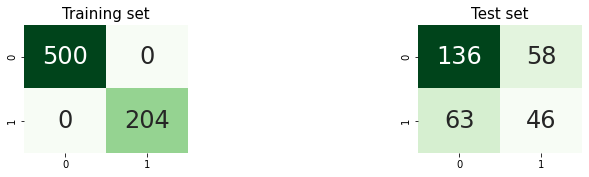

In [5]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)


plt.figure(figsize=(10,8))
plt.subplot(3,3,1)
plt.title("Training set",fontsize=15)
sns.heatmap(cm_train,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})
plt.subplot(3,3,3)
plt.title("Test set",fontsize=15)
sns.heatmap(cm_test,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})

print()
acc= ((cm_test[0][0] + cm_test[1][1])/len(y_test))*100
p=(cm_test[1][1]/(cm_test[1][1] + cm_test[1][0]))*100
r=(cm_test[1][1]/(cm_test[1][1] + cm_test[0][1]))*100
s=(cm_test[0][0]/(cm_test[0][0] + cm_test[1][0]))*100
specificity['Decision Tree'] = s
recall['Decision Tree'] = r
precision['Decision Tree'] = p
accuracies['Decision Tree'] = acc
print('Accuracy for training set for Decision Tree = {:.2f}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {:.2f}'.format(acc))
print('Precision for Decision Tree = {:.2f}'.format(p))
print('Recall for test set for Decision Tree = {:.2f}'.format(r))
print('Specificity for test set for Decision Tree = {:.2f}'.format(s))


Accuracy for training set for Naive Bayes = 0.73
Accuracy for test set for Naive Bayes = 68.32
Precision for Naive Bayes = 56.25
Recall for test set for Naive Bayes = 34.62
Specificity for test set for Naive Bayes = 85.93


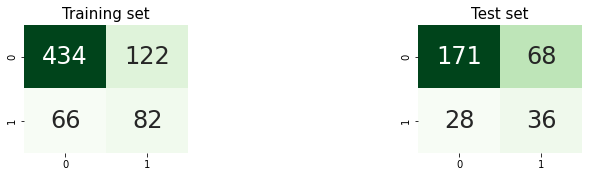

In [6]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)


plt.figure(figsize=(10,8))
plt.subplot(3,3,1)
plt.title("Training set",fontsize=15)
sns.heatmap(cm_train,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})
plt.subplot(3,3,3)
plt.title("Test set",fontsize=15)
sns.heatmap(cm_test,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})

print()
acc= ((cm_test[0][0] + cm_test[1][1])/len(y_test))*100
p=(cm_test[1][1]/(cm_test[1][1] + cm_test[1][0]))*100
r=(cm_test[1][1]/(cm_test[1][1] + cm_test[0][1]))*100
s=(cm_test[0][0]/(cm_test[0][0] + cm_test[1][0]))*100
specificity['Naive Bayes'] = s
recall['Naive Bayes'] = r
precision['Naive Bayes'] = p
accuracies['Naive Bayes'] = acc
print('Accuracy for training set for Naive Bayes = {:.2f}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {:.2f}'.format(acc))
print('Precision for Naive Bayes = {:.2f}'.format(p))

print('Recall for test set for Naive Bayes = {:.2f}'.format(r))
print('Specificity for test set for Naive Bayes = {:.2f}'.format(s))


Accuracy for training set for Logistic Regression = 0.76
Accuracy for test set for Logistic Regression = 68.32
Precision for Logistic Regression = 58.70
Recall for test set for Logistic Regression = 25.96
Specificity for test set for Logistic Regression = 90.45


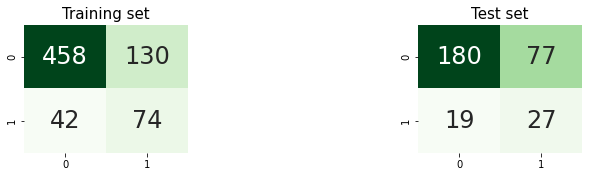

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)


plt.figure(figsize=(10,8))
plt.subplot(3,3,1)
plt.title("Training set",fontsize=15)
sns.heatmap(cm_train,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})
plt.subplot(3,3,3)
plt.title("Test set",fontsize=15)
sns.heatmap(cm_test,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})

print()
acc= ((cm_test[0][0] + cm_test[1][1])/len(y_test))*100
p=(cm_test[1][1]/(cm_test[1][1] + cm_test[1][0]))*100
r=(cm_test[1][1]/(cm_test[1][1] + cm_test[0][1]))*100
s=(cm_test[0][0]/(cm_test[0][0] + cm_test[1][0]))*100
specificity['Logistic Regression'] = s
recall['Logistic Regression'] = r
precision['Logistic Regression'] = p
accuracies['Logistic Regression'] = acc
print('Accuracy for training set for Logistic Regression = {:.2f}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {:.2f}'.format(acc))
print('Precision for Logistic Regression = {:.2f}'.format(p))


print('Recall for test set for Logistic Regression = {:.2f}'.format(r))
print('Specificity for test set for Logistic Regression = {:.2f}'.format(s))


Accuracy for training set for SVM = 0.77
Accuracy for test set for SVM = 68.65
Precision for SVM = 68.00
Recall for test set for SVM = 16.35
Specificity for test set for SVM = 95.98


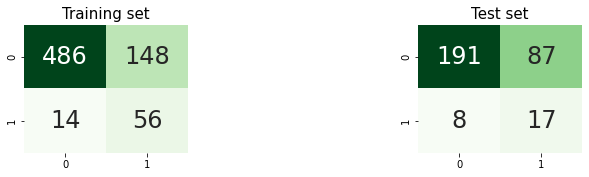

In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

plt.figure(figsize=(10,8))
plt.subplot(3,3,1)
plt.title("Training set",fontsize=15)
sns.heatmap(cm_train,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})
plt.subplot(3,3,3)
plt.title("Test set",fontsize=15)
sns.heatmap(cm_test,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})

print()
acc= ((cm_test[0][0] + cm_test[1][1])/len(y_test))*100
p=(cm_test[1][1]/(cm_test[1][1] + cm_test[1][0]))*100
r=(cm_test[1][1]/(cm_test[1][1] + cm_test[0][1]))*100
s=(cm_test[0][0]/(cm_test[0][0] + cm_test[1][0]))*100
specificity['SVM'] = s
recall['SVM'] = r
precision['SVM'] = p
accuracies['SVM'] = acc
print('Accuracy for training set for SVM = {:.2f}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for SVM = {:.2f}'.format(acc))
print('Precision for SVM = {:.2f}'.format(p))


print('Recall for test set for SVM = {:.2f}'.format(r))
print('Specificity for test set for SVM = {:.2f}'.format(s))


Accuracy for training set for Random Forest = 0.97
Accuracy for test set for Random Forest = 66.01
Precision for Random Forest = 50.91
Recall for test set for Rrandom Forest = 26.92
Specificity for test set for Random Forest = 86.43


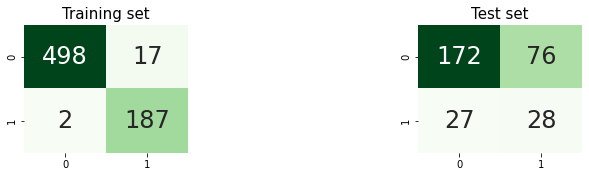

In [9]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

plt.figure(figsize=(10,8))
plt.subplot(3,3,1)
plt.title("Training set",fontsize=15)
sns.heatmap(cm_train,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})
plt.subplot(3,3,3)
plt.title("Test set",fontsize=15)
sns.heatmap(cm_test,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})

print()
acc= ((cm_test[0][0] + cm_test[1][1])/len(y_test))*100
p=(cm_test[1][1]/(cm_test[1][1] + cm_test[1][0]))*100
r=(cm_test[1][1]/(cm_test[1][1] + cm_test[0][1]))*100
s=(cm_test[0][0]/(cm_test[0][0] + cm_test[1][0]))*100
specificity['Random Forest'] = s
recall['Random Forest'] = r
precision['Random Forest'] = p
accuracies['Randon Forest'] = acc
print('Accuracy for training set for Random Forest = {:.2f}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {:.2f}'.format(acc))
print('Precision for Random Forest = {:.2f}'.format(p))

print('Recall for test set for Rrandom Forest = {:.2f}'.format(r))
print('Specificity for test set for Random Forest = {:.2f}'.format(s))

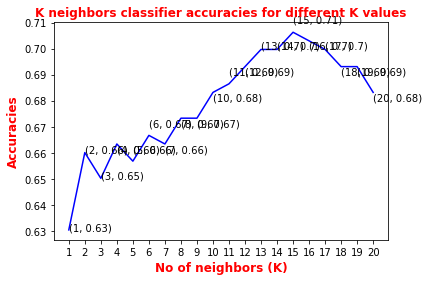

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_scores=[]
for k in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train ,y_train)
    y_pred= knn.predict(X_test)
    knn_scores.append(accuracy_score(y_pred,y_test)) 
    
plt.plot([k for k in range(1,21)],knn_scores,color='blue')
for i in range(1,21):
    plt.text(i, round(knn_scores[i-1],2), (i,round(knn_scores[i-1],2)))
plt.xticks([i for i in range(1,21)])
plt.xlabel('No of neighbors (K)',color='Red', weight='bold',fontsize='12')
plt.ylabel('Accuracies',color='Red', weight='bold',fontsize='12')
plt.title('K neighbors classifier accuracies for different K values',color='Red', weight='bold',fontsize='12')
plt.show()
plt.rcParams["font.weight"]="bold"
plt.rcParams["axes.labelweight"]="bold"
plt.rcParams["figure.figsize"] = (12,6)


Accuracy for training set for KNN = 0.76
Accuracy for test set for KNN = 70.63
Precision for KNN = 74.19
Recall for test set for KNN = 22.12
Specificity for test set for KNN = 95.98


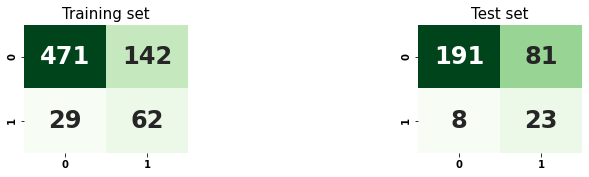

In [13]:
#highest accuracy at k=15
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train ,y_train)
y_pred= knn.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = knn.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

plt.figure(figsize=(10,8))
plt.subplot(3,3,1)
plt.title("Training set",fontsize=15)
sns.heatmap(cm_train,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})
plt.subplot(3,3,3)
plt.title("Test set",fontsize=15)
sns.heatmap(cm_test,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})

print()
acc= ((cm_test[0][0] + cm_test[1][1])/len(y_test))*100
p=(cm_test[1][1]/(cm_test[1][1] + cm_test[1][0]))*100
r=(cm_test[1][1]/(cm_test[1][1] + cm_test[0][1]))*100
s=(cm_test[0][0]/(cm_test[0][0] + cm_test[1][0]))*100
specificity['KNN'] = s
recall['KNN'] = r
precision['KNN'] = p
accuracies['KNN'] = acc

print('Accuracy for training set for KNN = {:.2f}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for KNN = {:.2f}'.format(acc))
print('Precision for KNN = {:.2f}'.format(p))

print('Recall for test set for KNN = {:.2f}'.format(r))
print('Specificity for test set for KNN = {:.2f}'.format(s))

roc_auc_score for DecisionTree:  0.5532470042520294
roc_auc_score for Logistic Regression:  0.7483088519520681
roc_auc_score for Naive Bayes:  0.7083011209895631
roc_auc_score for SVM:  0.6692114418245071
roc_auc_score for Random Forest:  0.64442404329339
roc_auc_score for KNN:  0.6250241592578276


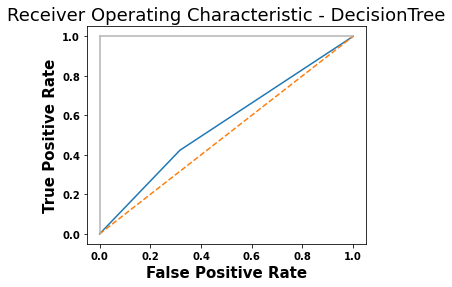

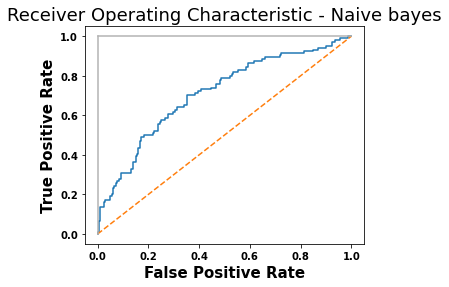

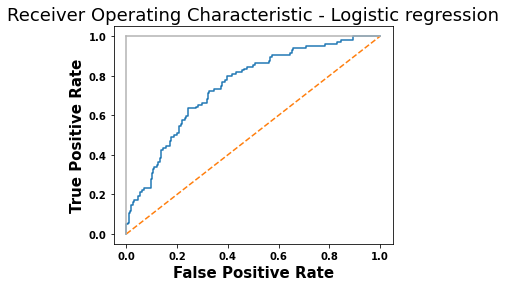

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

# Creating classifier
clf_tree = DecisionTreeClassifier()
clf_reg = LogisticRegression()
clf_nb = GaussianNB()
clf_svm = SVC(kernel = 'rbf',probability=True)
clf_rf = RandomForestClassifier(n_estimators = 10)
clf_knn = KNeighborsClassifier(n_neighbors=5)

# Training model
clf_tree.fit(X_train, y_train)
clf_reg.fit(X_train, y_train) 
clf_nb.fit(X_train, y_train)
clf_svm.fit(X_train, y_train)
clf_rf.fit(X_train, y_train)
clf_knn.fit(X_train, y_train)

# Getting predicted probabilities
y_score1 = clf_tree.predict_proba(X_test)[:,1]
y_score2 = clf_reg.predict_proba(X_test)[:,1]
y_score3 = clf_nb.predict_proba(X_test)[:,1]
y_score4 = clf_svm.predict_proba(X_test)[:,1]
y_score5 = clf_rf.predict_proba(X_test)[:,1]
y_score6 = clf_knn.predict_proba(X_test)[:,1]

# Ploting Receiving Operating Characteristic Curve
# Creating true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, y_score5)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, y_score6)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for Naive Bayes: ', roc_auc_score(y_test, y_score3))
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_score4))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score5))
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_score6))

# Ploting ROC curves
plt.subplots(1, figsize=(5,4))
plt.title('Receiver Operating Characteristic - DecisionTree',fontsize=18)
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.show()


plt.subplots(1, figsize=(5,4))
plt.title('Receiver Operating Characteristic - Naive bayes',fontsize=18)
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.show()

plt.subplots(1, figsize=(5,4))
plt.title('Receiver Operating Characteristic - Logistic regression',fontsize=18)
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.show()



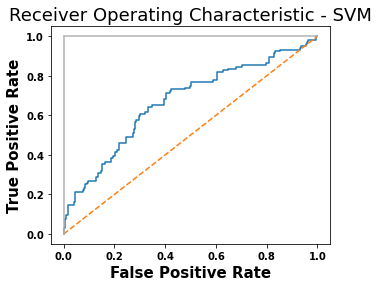

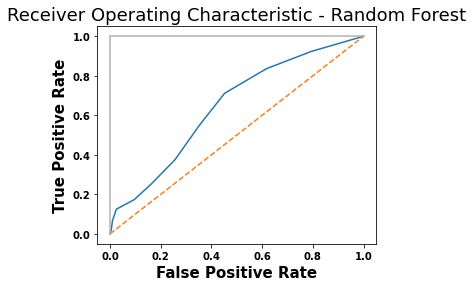

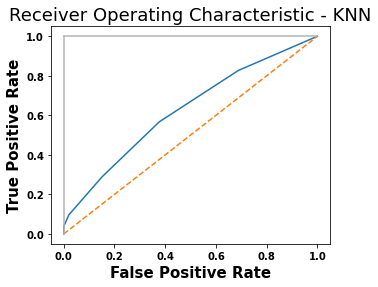

In [35]:
plt.subplots(1, figsize=(5,4))
plt.title('Receiver Operating Characteristic - SVM',fontsize=18)
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.show()

plt.subplots(1, figsize=(5,4))
plt.title('Receiver Operating Characteristic - Random Forest',fontsize=18)
plt.plot(false_positive_rate5, true_positive_rate5)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.show()

plt.subplots(1, figsize=(5,4))
plt.title('Receiver Operating Characteristic - KNN',fontsize=18)
plt.plot(false_positive_rate6, true_positive_rate6)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.show()

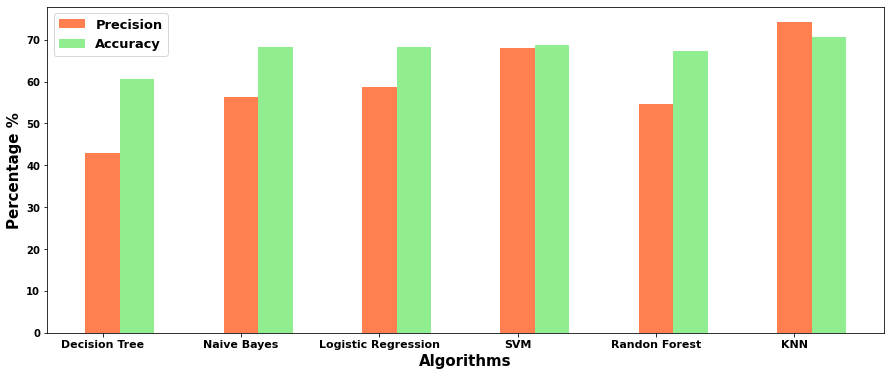

In [56]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(6)
plt.figure(figsize=(15,6))
x_pos = [i for i, _ in enumerate(list(precision.keys()))]
plt.ylabel("Percentage %",fontsize=15)
plt.xlabel("Algorithms",fontsize=15)

plt.bar(X + 0.00, list(precision.values()), color = 'coral', width = 0.25)
plt.bar(X + 0.25, list(accuracies.values()), color = 'lightgreen', width = 0.25)
plt.legend(["Precision", "Accuracy"],fontsize=13)
plt.xticks(x_pos,list(accuracies.keys()), fontsize=11)
plt.show()

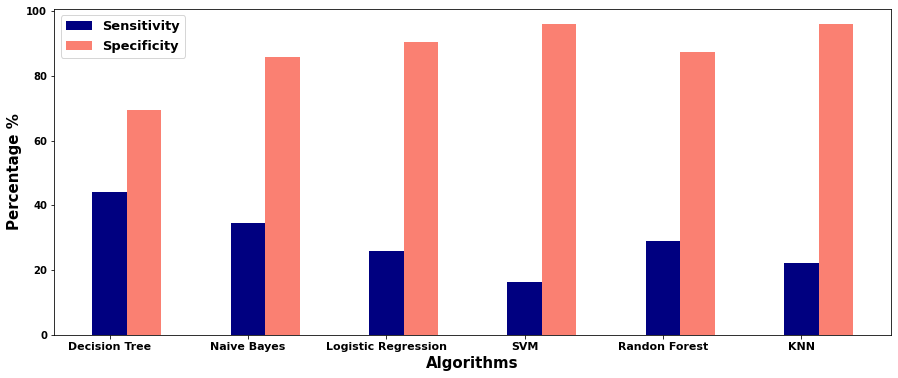

In [68]:

X = np.arange(6)
plt.figure(figsize=(15,6))
x_pos = [i for i, _ in enumerate(list(precision.keys()))]
plt.ylabel("Percentage %",fontsize=15)
plt.xlabel("Algorithms",fontsize=15)

plt.bar(X + 0.00, list(recall.values()), color = 'navy', width = 0.25)
plt.bar(X + 0.25, list(specificity.values()), color = 'salmon', width = 0.25)
plt.legend(["Sensitivity", "Specificity"],fontsize=13)
plt.xticks(x_pos,list(accuracies.keys()), fontsize=11)
plt.show()